# Week 04 (Clustering)

Kembali ke [Sains Data](../sainsdata2023.qmd)

Clustering adalah metode untuk membagi populasi atau titik data ke dalam sejumlah kelompok sedemikian rupa sehingga titik data dalam kelompok yang sama lebih mirip dengan titik data lain dalam kelompok yang sama dan berbeda dengan titik data dalam kelompok lain. Pada dasarnya, ini adalah kumpulan objek berdasarkan kesamaan dan ketidaksamaan di antara mereka.

source: https://www.geeksforgeeks.org/clustering-in-machine-learning/

Dataset: https://drive.google.com/file/d/1QWrWOYx2cZyEfYLe652Aj8IMm8mlkMy9/view?usp=sharing

## K-Means Clustering

K-means clustering adalah algoritma unsupervised learning yang mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda berdasarkan kesamaan tertentu$^{[1][2][3]}$. K-means clustering membutuhkan nilai k yang menandakan jumlah kluster yang akan dibentuk$^{[1][4]}$. K-means clustering berusaha untuk meminimalisasi variasi antar kluster dan memaksimalisasi variasi antar kluster$^{[2][5]}$. K-means clustering menggunakan rata-rata dan jarak antara data dan centroid untuk menentukan kluster$^{[2][5]}$. K-means clustering bekerja dengan baik jika kluster memiliki bentuk bola$^{[3]}$.

source:\
[1] https://www.trivusi.web.id/2022/06/algoritma-kmeans-clustering.html \
[2] https://raharja.ac.id/2020/04/19/k-means-clustering/ \
[3] https://ichi.pro/id/k-means-clustering-algoritma-aplikasi-metode-evaluasi-dan-kelemahan-186933724886154 \
[4] https://dqlab.id/k-means-clustering-salah-satu-contoh-teknik-analisis-data-populer \
[5] https://sis.binus.ac.id/2022/01/31/clustering-algoritma-k-means/.

### Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [23]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Using the elbow method to find the optimal number of clusters

In [9]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

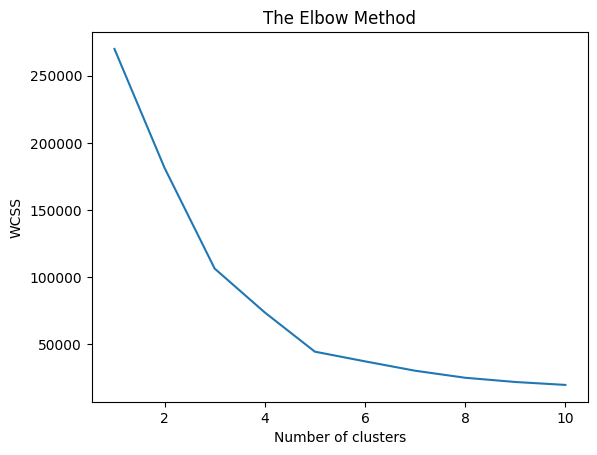

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

**Within-Cluster Sum-of-Squares criterion:**

$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

source:\
[1] https://scikit-learn.org/stable/modules/clustering.html#k-means \
[2] https://stats.stackexchange.com/questions/158210/k-means-why-minimizing-wcss-is-maximizing-distance-between-clusters


### Using the silhouette method to find the optimal number of clusters


Nilai Silhouette mengukur seberapa mirip sebuah titik dengan klasternya sendiri (kohesi) dibandingkan dengan klaster lain (pemisahan). \
Kisaran nilai Silhouette adalah antara +1 dan -1. Nilai yang tinggi diinginkan dan mengindikasikan bahwa titik tersebut ditempatkan pada klaster yang benar. Jika banyak titik yang memiliki nilai Silhouette negatif, hal ini dapat mengindikasikan bahwa kita telah membuat terlalu banyak atau terlalu sedikit cluster.\
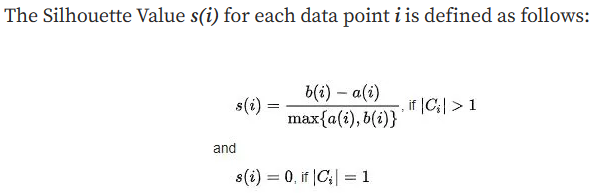

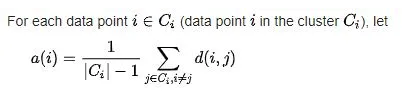

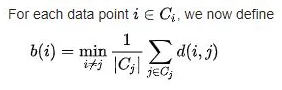

source:
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [27]:
import sklearn.metrics as metrics
for i in range(2,11):
  labels=KMeans(n_clusters=i,random_state=200).fit(X).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.2968969162503008
Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187


### Training the K-Means model on the dataset

In [28]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

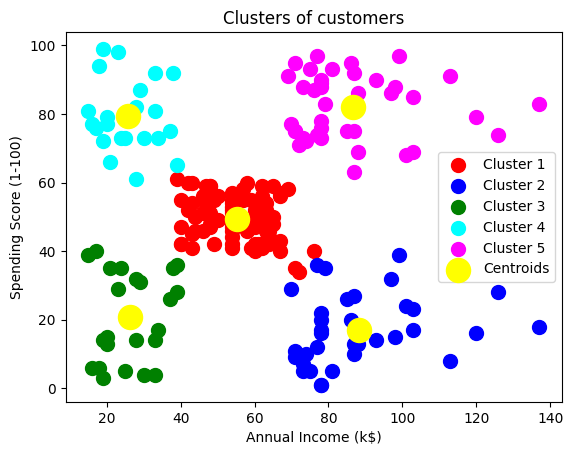

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [22]:
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Hierarchical Clustering

### Using the dendrogram to find the optimal number of clusters

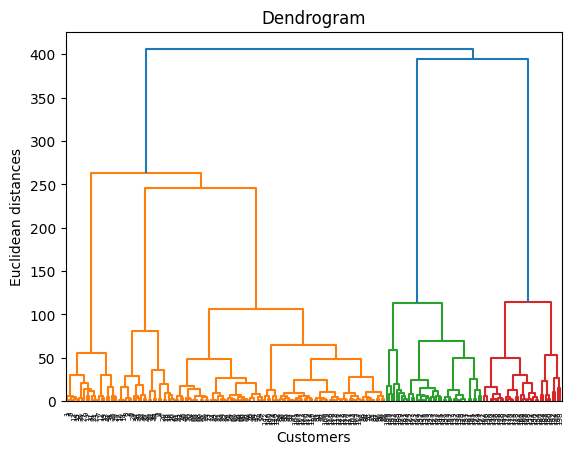

In [30]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
help(sch.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

### Training the Hierarchical Clustering model on the dataset

Hierarchical clustering adalah keluarga umum dari algoritma clustering yang membangun cluster bersarang dengan menggabungkan atau memisahkannya secara berurutan. Hirarki cluster ini direpresentasikan sebagai sebuah pohon (atau dendogram). Akar dari pohon adalah cluster unik yang mengumpulkan semua sampel, sedangkan daunnya adalah cluster yang hanya memiliki satu sampel.

Objek AgglomerativeClustering melakukan pengelompokan hirarkis menggunakan pendekatan dari bawah ke atas: setiap pengamatan dimulai dari klasternya sendiri, dan klaster-klaster tersebut digabungkan secara berurutan. Kriteria keterkaitan menentukan metrik yang digunakan untuk strategi penggabungan:

* Ward meminimalkan jumlah perbedaan kuadrat di dalam semua cluster. 
Ini adalah pendekatan yang meminimalkan varians dan dalam hal ini mirip dengan fungsi objektif k-means tetapi ditangani dengan pendekatan hirarki aglomeratif.

* Maximum atau complete linkage meminimalkan jarak maksimum antara pengamatan dari pasangan cluster.

* Average linkage meminimalkan rata-rata jarak antara semua pengamatan dari pasangan cluster.

* Single linkage meminimalkan jarak antara pengamatan terdekat dari pasangan cluster.

AgglomerativeClustering juga dapat menskalakan ke sejumlah besar sampel ketika digunakan bersama dengan matriks konektivitas, tetapi secara komputasi mahal ketika tidak ada batasan konektivitas yang ditambahkan di antara sampel: ia mempertimbangkan pada setiap langkah semua kemungkinan penggabungan.

source : https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualising the clusters

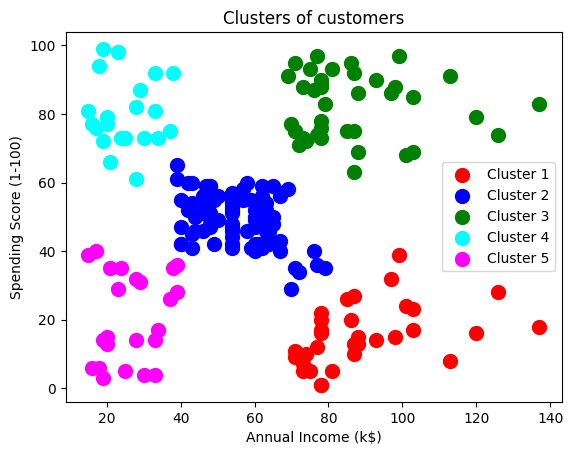

In [33]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()